In [90]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics

from datetime import datetime
from datetime import timedelta
from dateutil.parser import parse

import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
warnings.filterwarnings('ignore')

### Data Description

Loading master data 

In [92]:
df = pd.read_csv('master.csv')
df.head()

,Store_Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1_1,2/5/10,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1_1,2/12/10,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1_1,2/19/10,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1_1,2/26/10,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1_1,3/5/10,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


We want to see the dimension of our master dataset. It has 344667 rows and 15 columns.

In [93]:
df.shape


(344667, 15)

Now we want to check the missing values in the dataset. We have to use isna() function for checking missing values. We see that there are many missing values in markdown columns. As it is numeric columns, we want to replace missing values as zero.

In [94]:
df.isna().sum()

Store_Dept           0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270480
MarkDown2       278599
MarkDown3       276008
MarkDown4       278273
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [95]:
#Treating missing value as 0
df.fillna(0, inplace= True)

In [96]:
df.head()


,Store_Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1_1,2/5/10,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1_1,2/12/10,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315
2,1_1,2/19/10,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315
3,1_1,2/26/10,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315
4,1_1,3/5/10,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315


We would like to see the statistics of data

In [97]:
df.describe()

,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,344667.000000,344667.000000,344667.000000,344667.000000,344667.000000,344667.000000,344667.000000,344667.000000,344667.000000,344667.000000,344667.000000
mean,16011.033071,57.391070,3.278793,1588.057498,1058.111573,560.259852,744.976707,1046.938687,170.260421,8.119909,136807.198011
std,22859.611439,18.644742,0.454502,5424.631426,5607.297589,6110.587750,3899.167100,3078.805701,38.767201,1.865077,60944.571069
min,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-1.000000,0.000000,0.000000,126.064000,4.125000,34875.000000
25%,2100.335000,43.820000,2.843000,0.000000,0.000000,0.000000,0.000000,0.000000,131.940807,7.082000,93638.000000
50%,7638.860000,58.060000,3.263000,0.000000,0.000000,0.000000,0.000000,0.000000,182.238988,7.951000,140167.000000
75%,20179.490000,71.240000,3.669000,0.000000,0.000000,0.000000,0.000000,0.000000,211.406287,8.622000,202505.000000
max,693099.360000,100.140000,4.294000,88646.760000,104519.540000,141630.610000,67474.850000,37581.270000,225.367254,14.313000,219622.000000


Now, let us check the data types. We use dtypes attributes to see features are of which datatype.

In [98]:
df.dtypes

Store_Dept       object
Date             object
Weekly_Sales    float64
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
dtype: object

Categorical variables are: Store_Dept, Date, Type (multiclass) and IsHoliday(binary)
Numerical variables: Weekly_Sales. Temperature, Fuel_price, Markdown1, Markdown2, Markdown3, Markdown4, Markdown5, CPI, Unemploymeny, Size

### Data Preparation

In our dataset, date column is string and cannot be directly used in model, so we have seperated Year, month and week columns from Date column.

In [99]:
#prepare data- converting date
df['Date'] = pd.to_datetime(df['Date'], errors ='coerce')
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Week']=df['Date'].dt.week

In [100]:
#df['DateType'] = [datetime.strptime(date, '%y-%m-%d').date() for date in df['Date'].astype(str).values.tolist()]
df['Black_Friday'] = np.where((df['Date']==datetime(2010, 11, 26).date()) | (df['Date']==datetime(2011, 11, 25).date()), 'yes', 'no')
df['Pre_christmas'] = np.where((df['Date']==datetime(2010, 12, 23).date()) | (df['Date']==datetime(2010, 12, 24).date()) | (df['Date']==datetime(2011, 12, 23).date()) | (df['Date']==datetime(2011, 12, 24).date()), 'yes', 'no')
df['Black_Friday'] = 'Black_Friday_' + df['Black_Friday'].map(str)
df['Pre_christmas'] = 'Pre_christmas_' + df['Pre_christmas'].map(str)
Black_Friday_dummies = pd.get_dummies(df['Black_Friday'] )
Pre_christmas_dummies = pd.get_dummies(df['Pre_christmas'] )

For Type column, there are three levels 'A', 'B', 'C'. We want to use dummy coding for Type. So we have created three dummy variables Type_A, Type_B, Type_C.

In [101]:
#Dummy for Type
df['Type'] = 'Type_'+ df['Type']
df_Type = pd.get_dummies(df['Type'])
df = pd.concat([df, df_Type], axis=1)

The store and Department columns are joined together in our dataset, we wanted to create two seperate columns for Store and Department

In [102]:
store_dept = df["Store_Dept"].str.split("_", n = 1, expand = True) 
 
# making separate Store column from new data frame 
df["Store"]= store_dept[0] 
  
# making separate Dept column from new data frame 
df['Department']= store_dept[1] 
  
# Dropping old Store_Dept columns 
df.drop(columns =['Store_Dept'], inplace = True) 

In [103]:
df_original = df.copy(deep=True)


In [104]:
df_original.head()

,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Year,Month,Week,Black_Friday,Pre_christmas,Type_A,Type_B,Type_C,Store,Department
0,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,...,2010,2,5,Black_Friday_no,Pre_christmas_no,1,0,0,1,1
1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,...,2010,2,6,Black_Friday_no,Pre_christmas_no,1,0,0,1,1
2,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,...,2010,2,7,Black_Friday_no,Pre_christmas_no,1,0,0,1,1
3,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,...,2010,2,8,Black_Friday_no,Pre_christmas_no,1,0,0,1,1
4,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,...,2010,3,9,Black_Friday_no,Pre_christmas_no,1,0,0,1,1


In [105]:
df['Store'] = 'Store_' + df['Store']
df['Department'] = 'Dept_' + df['Department']

df_s = pd.get_dummies(df['Store'])
df = pd.concat([df, df_s], axis=1)

df_d = pd.get_dummies(df['Department'])
df = pd.concat([df, df_d], axis=1)
  

In [107]:
Black_Friday_dummies = pd.get_dummies(df['Black_Friday'] )
df = pd.concat([df, Black_Friday_dummies], axis=1)
Pre_christmas_dummies = pd.get_dummies(df['Pre_christmas'] )
df = pd.concat([df, Pre_christmas_dummies], axis=1)

In [108]:
df.head()

,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Black_Friday_no,Black_Friday_yes,Pre_christmas_no,Pre_christmas_yes
0,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0
1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0
2,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0
3,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0
4,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0


### Supervised learning (regression)

**Sperating predictors and Weekly Sales columns**

We want to create Supervised learning models in our data. We want to predict weekly Sales of Walmart. As we have dummy codings for Store Type, we are dropping Type_A from data, as we want to use Type A as our base category. We dropped Date column as well as we have week, month and year column seperated.

In [114]:
#separating columns for train test split
X = df.drop(columns=['Weekly_Sales','Date','Type','Type_A','Week','Month','Year','Store','Department','Black_Friday_no', 'Pre_christmas_no'])
y = df[['Weekly_Sales']]

**Splitting the data into train and test set**

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

**Run Linear Regression**

First, we will run full regression model.

In [116]:
# Create linear regression object
regr = LinearRegression()

In [117]:
# Train the model using the training sets
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

ValueError: could not convert string to float: 'Black_Friday_no'

In [ ]:
#Report MSE for the classifier
print("MSE: %.2f" % np.mean((y_pred - y_test) ** 2))
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
accuracy = regr.score(X_test,y_test)
print("R squared:",  metrics.r2_score(y_test, y_pred))
print("accuracy: ",accuracy*100,'%')

As we can see accuracy is not good enough, we want to run regression in selected variables.

**Plot correlation Matrix**

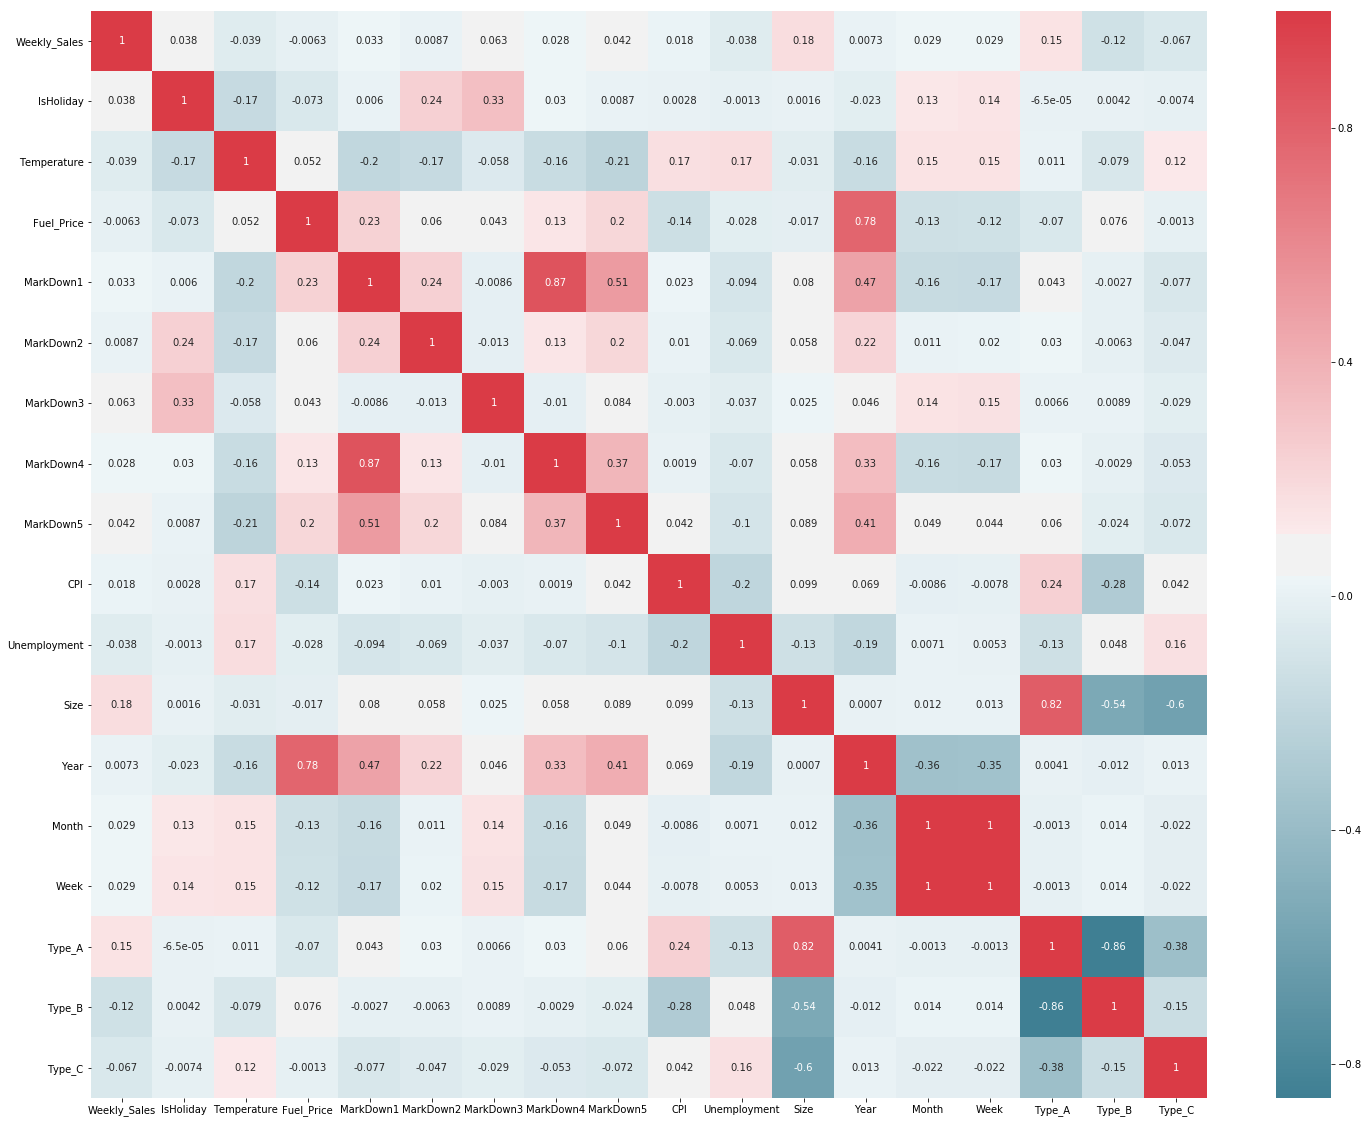

In [49]:
plt.figure(figsize=(25,20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_original.corr(),annot=True, cmap=cmap)

Below pairs have high corelation: [Type and Size]
                                [Temperature and Week]
                                [Unemployment and CPI]

In [50]:
X = df.drop(columns=['Weekly_Sales','Date','Type','Type_A','Store_1','Dept_1','Week','Month','Year','Store','Department','MarkDown4','CPI'])
y=df['Weekly_Sales']

X_train,X_test,y_train,y_test=train_test_split( X, y, test_size=0.2, random_state=42)

In [51]:
# Train the model using the training sets
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [52]:
#Report MSE for the classifier
print("MSE: %.2f" % np.mean((y_pred - y_test) ** 2))
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
accuracy = regr.score(X_test,y_test)
print('accuracy: ',accuracy*100,'%')

MSE: 416623412.06
13207.487359914096
416623412.05630326
20411.35497845019
accuracy:  49.71454399823761 %


**Run K neigbour Regression**

In [53]:
knr = KNeighborsRegressor()

In [54]:
df_original

,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Type,Size,Year,Month,Week,Type_A,Type_B,Type_C,Store,Department
1,2010-02-12,46039.49,True,38.51,2.548,0.00,0.00,0.00,0.00,0.00,...,Type_A,151315,2010,2,6,1,0,0,1,1
2,2010-02-19,41595.55,False,39.93,2.514,0.00,0.00,0.00,0.00,0.00,...,Type_A,151315,2010,2,7,1,0,0,1,1
8,2010-04-02,57258.43,False,62.27,2.719,0.00,0.00,0.00,0.00,0.00,...,Type_A,151315,2010,4,13,1,0,0,1,1
9,2010-04-09,42960.91,False,65.86,2.770,0.00,0.00,0.00,0.00,0.00,...,Type_A,151315,2010,4,14,1,0,0,1,1
38,2010-10-29,38640.93,False,69.64,2.716,0.00,0.00,0.00,0.00,0.00,...,Type_A,151315,2010,10,43,1,0,0,1,1
39,2010-11-05,34238.88,False,58.74,2.689,0.00,0.00,0.00,0.00,0.00,...,Type_A,151315,2010,11,44,1,0,0,1,1
44,2010-12-10,31497.65,False,46.33,2.843,0.00,0.00,0.00,0.00,0.00,...,Type_A,151315,2010,12,49,1,0,0,1,1
45,2010-12-17,44912.86,False,49.84,2.869,0.00,0.00,0.00,0.00,0.00,...,Type_A,151315,2010,12,50,1,0,0,1,1
46,2010-12-24,55931.23,False,52.33,2.886,0.00,0.00,0.00,0.00,0.00,...,Type_A,151315,2010,12,51,1,0,0,1,1
53,2011-02-11,37887.17,True,36.39,3.022,0.00,0.00,0.00,0.00,0.00,...,Type_A,151315,2011,2,6,1,0,0,1,1


In [55]:
X = df_original.drop(columns=['Weekly_Sales','Date','Type','Type_A','Week','Month','Year','MarkDown1',
                             'MarkDown2','MarkDown3','MarkDown4','MarkDown5'])
y=df_original['Weekly_Sales']

X_train,X_test,y_train,y_test=train_test_split( X, y, test_size=0.2, random_state=42)

In [56]:
X_train.head()

,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Type_B,Type_C,Store,Department
104046,False,56.89,2.849,126.381548,7.795,219622,0,0,13,92
75233,False,54.12,3.781,130.454621,7.545,126512,1,0,10,32
206113,False,37.51,2.961,132.978323,8.149,152513,0,0,26,38
47518,False,44.98,3.010,213.714341,6.858,202505,0,0,6,92
89213,False,54.40,3.909,128.616064,14.021,112238,1,0,12,8


In [57]:
# Train the model using the training sets
knr.fit(X_train, y_train)
y_pred = knr.predict(X_test)

In [58]:
#2 Report MSE for the classifier
print("MSE: %.2f" % np.mean((y_pred - y_test) ** 2))
print("Mean Absolute Error: %.2f"  % metrics.mean_absolute_error(y_test, y_pred))
#print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
accuracy = knr.score(X_test,y_test)
print('accuracy: ',accuracy*100,'%')

MSE: 513909685.45
Mean Absolute Error: 13575.65
22669.576207930757
accuracy:  37.9723219372478 %


**Cross fold validation**

**Run Linear Regression**

First, we will run full regression model.

In [59]:

#X = df.drop(columns=['Weekly_Sales','Date','Type','Type_A','Week','Month','Year','Store','Department'])
X = df.drop(columns=['Weekly_Sales','Date','Type','Type_A','Store_1','Dept_1','Week','Month','Year','Store','Department',
                     'MarkDown4','CPI'])
y=df['Weekly_Sales']

#X_train,X_test,y_train,y_test=train_test_split( X, y, test_size=0.2, random_state=42)

In [60]:
# Create linear regression object
regr = LinearRegression()
print("Linear Regression")

print("Explained Varience: %0.2f (+/- %0.2f)" % (cross_val_score(regr, X, y, cv=10, scoring='explained_variance').mean(), cross_val_score(regr, X, y, cv=10, scoring='explained_variance').std() * 2))
print("R squared: %0.2f (+/- %0.2f)" % (cross_val_score(regr, X, y, cv=10, scoring='r2').mean(), cross_val_score(regr, X, y, cv=10, scoring='r2').std() * 2))
print("Negative Mean Absolute Error: %0.2f (+/- %0.2f)" % (cross_val_score(regr, X, y, cv=10, scoring='neg_mean_absolute_error').mean(), cross_val_score(regr, X, y, cv=10, scoring='neg_mean_absolute_error').std() * 2))


Linear Regression
Explained Varience: 0.24 (+/- 0.60)
R squared: 0.14 (+/- 0.71)
Negative Mean Absolute Error: -18299.18 (+/- 7652.89)


**Run K neigbour Regression**

In [34]:
X = df_original.drop(columns=['Weekly_Sales','Date','Type','Type_A','Week','Month','Year','MarkDown1',
                             'MarkDown2','MarkDown3','MarkDown4','MarkDown5',])
y=df_original['Weekly_Sales']

#X_train,X_test,y_train,y_test=train_test_split( X, y, test_size=0.2, random_state=42)

In [35]:
# Create knn regression object
knr = KNeighborsRegressor()
print("K Neighbour Regression")

print("Explained Varience: %0.2f (+/- %0.2f)" % (cross_val_score(knr, X, y, cv=10, scoring='explained_variance').mean(), cross_val_score(knr, X, y, cv=10, scoring='explained_variance').std() * 2))
print("R squared: %0.2f" % (cross_val_score(knr, X, y, cv=10, scoring='r2').mean()))
print("Negative Mean Absolute Error: %0.2f" % (cross_val_score(knr, X, y, cv=10, scoring='neg_mean_absolute_error').mean()))


K Neighbour Regression
Explained Varience: 0.32 (+/- 0.40)
R squared: 0.30
Negative Mean Absolute Error: -10930.16


### Predict Weekly Sales for Test data

Load test dataset

In [53]:
test = pd.read_csv('test.csv')
test.head()

,Store_Dept,Weekly_Sales,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1_1,17147.44,5/4/12,False,75.55,3.749,21290.13,NaN,69.89,4977.35,3261.04,221.671800,7.143,A,151315
1,1_1,18164.20,5/11/12,False,73.77,3.688,8351.40,NaN,10.52,2443.14,3127.88,221.725663,7.143,A,151315
2,1_1,18517.79,5/18/12,False,70.33,3.630,6154.14,NaN,45.11,1675.49,5508.18,221.742674,7.143,A,151315
3,1_1,16963.55,5/25/12,False,77.22,3.561,4039.39,NaN,745.19,1429.96,3631.13,221.744944,7.143,A,151315
4,1_1,16065.49,6/1/12,False,77.95,3.501,6086.21,12.0,370.51,148.75,3690.85,221.747214,7.143,A,151315


We want to do similar modifications in test dataset

In [54]:
test.fillna(0, inplace= True)
#prepare data- converting date
test['Date'] = pd.to_datetime(test['Date'], errors ='coerce')
test['Year']=test['Date'].dt.year
test['Month']=test['Date'].dt.month
test['Week']=test['Date'].dt.week

#Dummy for Type
test['Type'] = 'Type_'+ test['Type']
test_Type = pd.get_dummies(test['Type'])
test = pd.concat([test, test_Type], axis=1)

In [55]:
test.head()

,Store_Dept,Weekly_Sales,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,CPI,Unemployment,Type,Size,Year,Month,Week,Type_A,Type_B,Type_C
0,1_1,17147.44,2012-05-04,False,75.55,3.749,21290.13,0.0,69.89,4977.35,...,221.671800,7.143,Type_A,151315,2012,5,18,1,0,0
1,1_1,18164.20,2012-05-11,False,73.77,3.688,8351.40,0.0,10.52,2443.14,...,221.725663,7.143,Type_A,151315,2012,5,19,1,0,0
2,1_1,18517.79,2012-05-18,False,70.33,3.630,6154.14,0.0,45.11,1675.49,...,221.742674,7.143,Type_A,151315,2012,5,20,1,0,0
3,1_1,16963.55,2012-05-25,False,77.22,3.561,4039.39,0.0,745.19,1429.96,...,221.744944,7.143,Type_A,151315,2012,5,21,1,0,0
4,1_1,16065.49,2012-06-01,False,77.95,3.501,6086.21,12.0,370.51,148.75,...,221.747214,7.143,Type_A,151315,2012,6,22,1,0,0


In [56]:
store_dept = test["Store_Dept"].str.split("_", n = 1, expand = True) 
 
# making separate Store column from new data frame 
test["Store"]= store_dept[0] 
  
# making separate Dept column from new data frame 
test['Department']= store_dept[1] 
  
# Dropping old Store_Dept columns 
test.drop(columns =['Store_Dept'], inplace = True) 

In [57]:

test['Store'] = 'Store_' + test['Store']
test['Department'] = 'Dept_' + test['Department']

df_Type = pd.get_dummies(test['Store'])
test = pd.concat([test, df_Type], axis=1)

df_Type = pd.get_dummies(test['Department'])
test = pd.concat([test, df_Type], axis=1)

In [59]:
#test["Department"].unique

In [60]:

X_train =  df.drop(columns=['Weekly_Sales','Date','Type','Type_A','Store_1','Dept_1','Week','Month','Year',
                            'Store','Department','MarkDown4','CPI'])
y_train =  df[['Weekly_Sales']]
X_test =  test.drop(columns=['Weekly_Sales','Date','Type','Type_A','Store_1','Dept_1','Week','Month','Year',
                            'Store','Department','MarkDown4','CPI'])
y_test =  test[['Weekly_Sales']]

We want to check the dimension of train and test data

In [61]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(344667, 135) (344667, 1) (76903, 135) (76903, 1)


fitting the linear regression model in test data

In [62]:
regr = LinearRegression() 
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [63]:
test['Weekly_Sales_Predicted'] = y_pred

Checking the metrics score

In [64]:
print('Variance score: %.2f' % regr.score(X_test, y_test))
#print("MSE: %.2f" % np.mean((y_pred - y_test) ** 2))
print("Mean absolute Error: %.2f" % metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: %.2f" % metrics.mean_squared_error(y_test, y_pred))
print("Squareroot of Mean absolute Error: %.2f" %np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
accuracy = regr.score(X_test,y_test)
print('accuracy Linear Regrssion: ',accuracy*100,'%')


Variance score: 0.69
Mean absolute Error: 8016.26
Mean Squared Error: 148218468.07
Squareroot of Mean absolute Error: 12174.50
accuracy Linear Regrssion:  69.46851741395078 %


In [65]:
test.head()

,Weekly_Sales,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Weekly_Sales_Predicted
0,17147.44,2012-05-04,False,75.55,3.749,21290.13,0.0,69.89,4977.35,3261.04,...,0,0,0,0,0,0,0,0,0,26909.051515
1,18164.20,2012-05-11,False,73.77,3.688,8351.40,0.0,10.52,2443.14,3127.88,...,0,0,0,0,0,0,0,0,0,27238.975126
2,18517.79,2012-05-18,False,70.33,3.630,6154.14,0.0,45.11,1675.49,5508.18,...,0,0,0,0,0,0,0,0,0,27588.122107
3,16963.55,2012-05-25,False,77.22,3.561,4039.39,0.0,745.19,1429.96,3631.13,...,0,0,0,0,0,0,0,0,0,27490.206782
4,16065.49,2012-06-01,False,77.95,3.501,6086.21,12.0,370.51,148.75,3690.85,...,0,0,0,0,0,0,0,0,0,27437.657707
